In [1]:
#Import Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Load the data
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
#Remove the index column
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
advert.drop(['Unnamed: 0'], axis = 1, inplace = True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### A: Exploratory Analysis

In [6]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


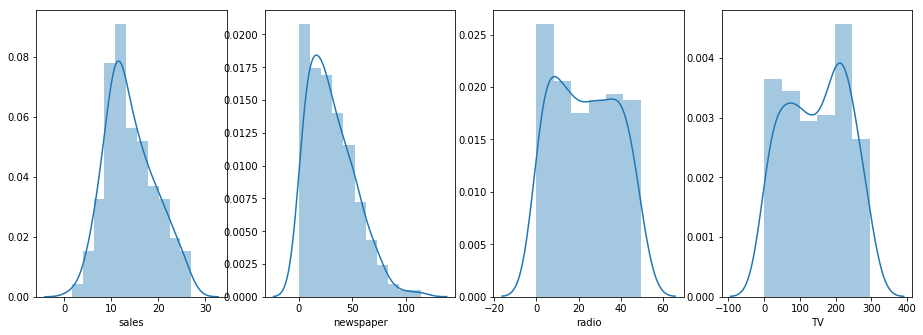

In [51]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(15.7, 5.27)

sns.distplot(advert.sales, ax=axs[0]);
sns.distplot(advert.newspaper, ax=axs[1]);
sns.distplot(advert.radio, ax=axs[2]);
sns.distplot(advert.TV, ax=axs[3]);

#### B: Exploring Relationships between Predictors and Response

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


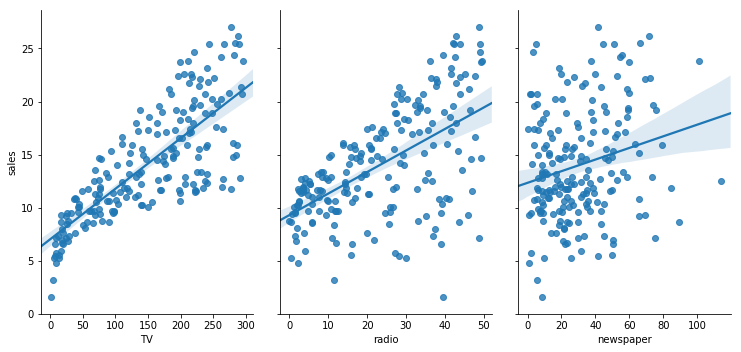

In [52]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=0.7, kind='reg');

In [53]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [54]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


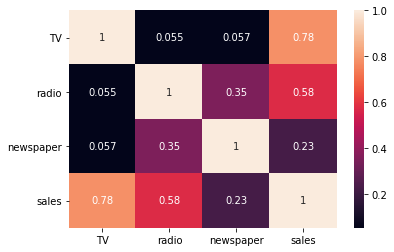

In [55]:
sns.heatmap( advert.corr(), annot=True );

#### C: Creating the Simple Linear Regression Model

In [56]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [57]:
# check the type and shape of X

print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [58]:
y = advert.sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [59]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [43]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### D: Interpreting Model Coefficients

In [44]:
# print the intercept and coefficients

print(linreg.intercept_)
print(linreg.coef_)

6.91197261886872
[0.04802945]


#### E: Making Predictions with our Model

In [45]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

#### F: Model Evaluation Metrics

In [46]:
# define true and predicted response values

true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [47]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [48]:
# calculate MSE by hand

print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [49]:
# calculate RMSE by hand
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [50]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
